 Data loaded successfully!

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None

--- Summary Statistics ---
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000       

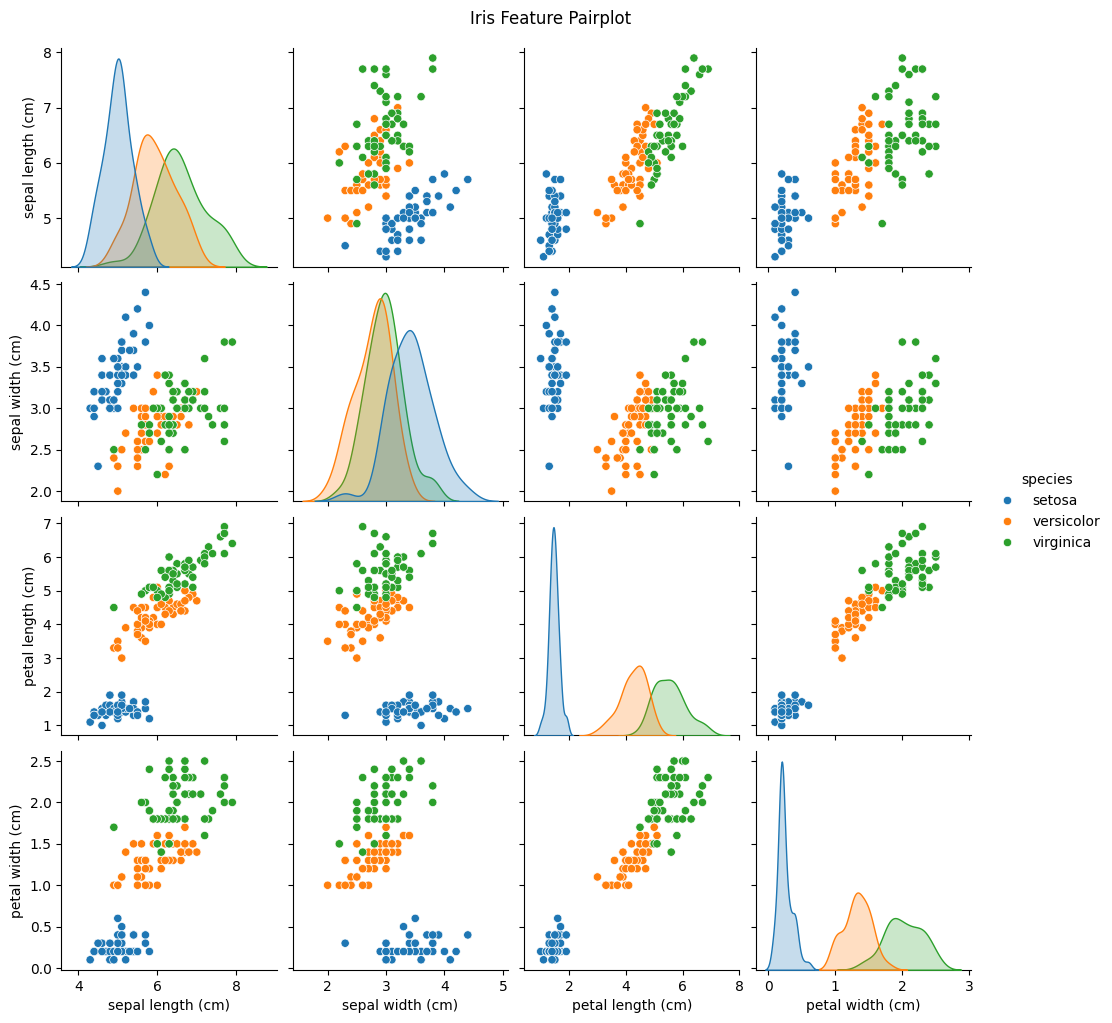


Training samples: 120
Testing samples: 30

 Model Evaluation Results:
('Accuracy:', 0.9) %

--- Confusion Matrix ---
[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]

--- Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



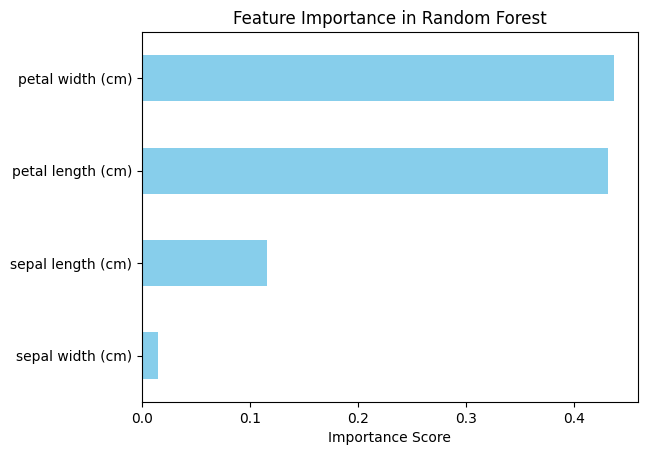

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")


y = y.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print(" Data loaded successfully!")


print("\n--- Dataset Info ---")
print(X.info())

print("\n--- Summary Statistics ---")
print(X.describe())

print("\n--- Class Distribution ---")
print(y.value_counts())


sns.pairplot(pd.concat([X, y], axis=1), hue="species")
plt.suptitle("Iris Feature Pairplot", y=1.02)
plt.show()


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("\n Model Evaluation Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))


importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.show()
